# Scipy学习记录
Scipy是基于Numpy在科学计算领域非常强大的一个库。在优化、非线性方程求解、常微分方程等方面应用广泛，因此可以与Numpy、pandas、matplotlib结合来替代Matlab。本文介绍Scipy数据的输入输出和常用的一些模块。照旧导入相关库。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1、基本数据
基本的数据类型是采用numpy中的ndarray。另外Scipy比较特殊的一点是导入每个Scipy子模块需要from...import语句，不然直接使用会出错。Scipy除了一般的读取文件功能之外还能够读取和写入.mat文件，果然是为了让matlab用户更加适应呢。

In [2]:
from scipy import io as sio

In [3]:
data1 = np.arange(0,10)
data2 = np.random.rand(3,4)
# 以字典格式读入输入
sio.savemat('my_data.mat',{'data1':data1,'data2':data2})
sio.loadmat('my_data.mat')

## 2、优化
优化是很多科学计算的基础，例如机器学习各种方法、最优控制等，甚至求解方程也可以转化为优化问题。这一部分就介绍一下Scipy的优化模块。

In [4]:
from scipy import optimize

In [5]:
# 定义要优化的函数,输入优化变量和参数
def f1(x,para):
    return (x[0]**2+x[1]**2+para)
res = optimize.minimize(f1,[10,10],args=(20),method = 'SLSQP')

这样我们就解决了一个简单的无约束优化问题，可选择的优化方法也有很多('BFGS','SLSQP','Newton-CG'),得到的结果是一个对象，我们可以通过读取不同的属性来得到优化信息。

In [6]:
res

     fun: 20.0
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 9
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0., 0.])

除了解决无约束优化问题，optimize模块同样可以对线性约束和非线性约束问题进行优化。同样是上面的问题，我们使用加上约束条件。

In [7]:
def f_cons(x):
    return np.exp(x)

In [8]:
# 求解同上 不等式是表示小于零的
res1 = optimize.minimize(f1,[10,10],args=(20),method = 'SLSQP',constraints=({'type':'eq','fun':lambda x:x[0]-x[1]+10}))
res2 = optimize.minimize(f1,[10,10],args=(20),method = 'SLSQP',constraints=
                         ({'type':'ineq','fun':lambda x: f_cons(x)-10},{'type':'ineq','fun':lambda x:2-f_cons(x)}))
res1,res2

(     fun: 70.00000000850284
      jac: array([-9.9998703, 10.0001297])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 5
     njev: 5
   status: 0
  success: True
        x: array([-4.9999348,  5.0000652]),      fun: 30.603795394109287
      jac: array([4.60517001, 4.60517001])
  message: 'Optimization terminated successfully.'
     nfev: 149
      nit: 26
     njev: 22
   status: 0
  success: True
        x: array([2.302585, 2.302585]))

## 3、求解方程
求解方程是科学计算领域的重要部分，上面的优化方法也可以求解方程，而Scipy中也有专门的函数来求解方程。求解方程方法fsolve()可以是多个等式的或者单个等式。

In [9]:
import math
def f(x):
    return [
        5*x[1]+3,
        4*x[0]**2 - 2*math.sin(x[1]*x[2]),
        x[1]*x[2] - 1.5
    ]
res = optimize.fsolve(f,[2,1,1])
res

array([ 0.70622057, -0.6       , -2.5       ])

在看官方文档的时候看到了另一个返回信息更多的函数root，看官方的解释差不多是上个函数返回能找到的所有值，而这个利用迭代的方法找到一个解。

In [10]:
optimize.root(f,[2,1,1])

    fjac: array([[ 4.13852232e-14, -9.96895994e-01,  7.87297778e-02],
       [ 9.64802886e-01,  2.07038946e-02,  2.62157854e-01],
       [ 2.62974127e-01, -7.59587168e-02, -9.61808131e-01]])
     fun: array([ 0.00000000e+00, -4.44089210e-15, -1.11022302e-15])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-1.90165780e-10,  1.58242735e-11, -5.80562995e-11])
       r: array([-4.22657103,  2.34381095,  0.53357896,  5.18240573, -0.21091189,
        0.77379626])
  status: 1
 success: True
       x: array([ 0.70622057, -0.6       , -2.5       ])

## 4、数值积分
利用Scipy也可以进行积分的运算和常微分方程的龙格库塔积分。

In [11]:
from scipy import integrate
f1 = lambda x: x**2
# 0到4的定积分，得到结果和预计误差
integrate.quad(f1,0,4)

(21.333333333333336, 2.368475785867001e-13)

In [12]:
invexp = lambda x: np.exp(-x)
integrate.quad(invexp, 0, np.inf)

(1.0000000000000002, 5.842606703608969e-11)

龙格库塔积分是解决固定初值的一组常微分方程积分问题的方法。Scipy库中龙格库塔积分方法是变步长积分，可以设置最大步长。最近刚刚更新了RK45函数，但是没太看懂新的API的含义。这里仍然使用旧格式，但是仍然可以使用。

In [13]:
def pend(y, t,b,c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt
t = np.linspace(0,10,num=100)
res_intep = integrate.odeint(pend,[np.pi - 0.1, 0.0],t,args=(0.25,5))
res_intep[:5,:]

array([[ 3.04159265,  0.        ],
       [ 3.03905676, -0.05021189],
       [ 3.03140592, -0.10169818],
       [ 3.01838288, -0.15701345],
       [ 2.99946738, -0.21883071]])

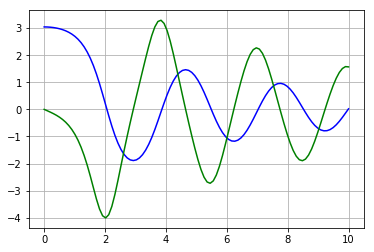

In [14]:
plt.plot(t, res_intep[:, 0], 'b', label='theta(t)')
plt.plot(t, res_intep[:, 1], 'g', label='omega(t)')
plt.grid()
plt.show()

## 5、插值
插值也就是我们常说的拟合数据。简单的拟合是一维数据的拟合，类似于机器学习的训练和测试过程，拟合也需要先进行训练然后再插值计算。这里我们直接来拟合上面的图像,拟合有许多方法线性、立方、多项式，默认是线性。新版本的库中可以增加外插选项。

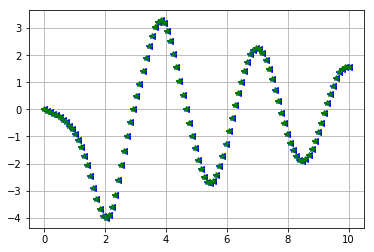

In [15]:
from scipy import interpolate
a = interpolate.interp1d(t, res_intep[:,1],fill_value='extrapolate')
plt.plot(t, a(t), 'b<')
plt.plot(t, res_intep[:, 1], 'g*')
plt.grid()
plt.show()

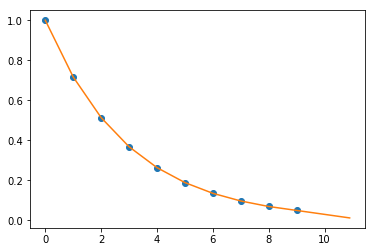

In [16]:
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y,fill_value='extrapolate')
xnew = np.arange(0, 11, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()